### 군집화(Clustering) : K-Mean Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# 데이터 정규화 
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)

In [4]:
# 차원축소 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [5]:
df = pd.DataFrame(iris.data, columns=['sl','sw', 'pl', 'pw'])
df['target'] = iris.target
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

,sl,sw,pl,pw,target,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-2.364229,-0.341908


In [6]:
# 군집화 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [8]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(3)

,sl,sw,pl,pw,PC1,PC2,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,1
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,1
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,1


In [9]:
df.groupby(['target','cluster']).count()

sl  sw  pl  pw  PC1  PC2
target cluster                          
0      1        50  50  50  50   50   50
1      0        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      0        36  36  36  36   36   36
       2        14  14  14  14   14   14

In [10]:
# 데이터 시각화 

No handles with labels found to put in legend.


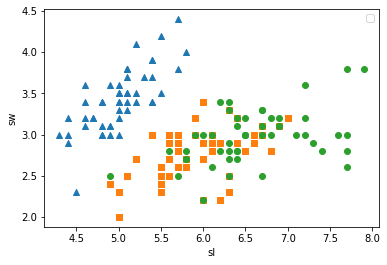

In [11]:
# 오리지널 
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['sl']
    y_axis_data = df[df.target == i]['sw']
    plt.scatter(x_axis_data, y_axis_data, marker= marker)
plt.legend()
plt.xlabel('sl')
plt.ylabel('sw')
plt.show()

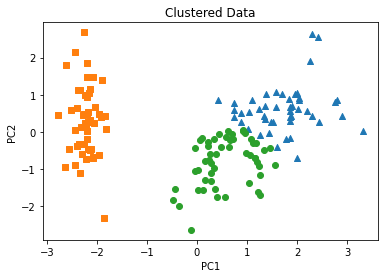

In [12]:
# 군집화 시각화 
for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker= marker)
plt.title('Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# plt.legend() 범례표시하기 

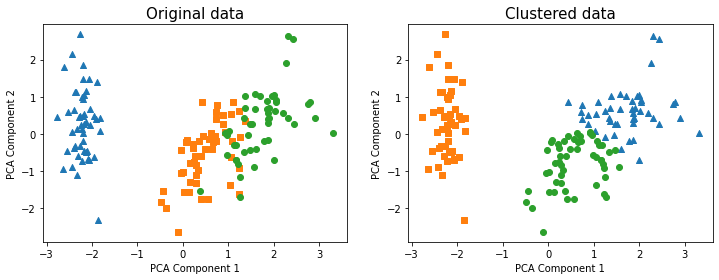

In [13]:
# 두 그림 비교 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))       
for k, column in enumerate(['target', 'cluster']):
    ax= axs[k]              

    for i, marker in enumerate(markers): 
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker)
    
    if k == 0 :         # original
        ax.set_title('Original data', fontsize = 15)
    else:
        ax.set_title('Clustered data', fontsize = 15)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
plt.show()

In [27]:
# 이 밑으로 T 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Iris 데이터를 차원축소

In [15]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca =PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [17]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

,sl,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908


- Kmeans 군집화

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)        # 모델생성 

In [19]:
kmeans.fit(iris_std)        # std를 줘서 학습(x만 주기) : 비지도학습.. 

KMeans(n_clusters=3, random_state=2021)

In [20]:
kmeans.labels_          ## 클러스터의 라벨은 무작위 / 반드시 target 인덱스와 동일할 보장은 없다 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [21]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pl,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,0
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,0
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,0
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [22]:
df.groupby(['target','cluster']).count()

sl  sw  pl  pw  PC1  PC2
target cluster                          
0      1        50  50  50  50   50   50
1      0        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      0        36  36  36  36   36   36
       2        14  14  14  14   14   14

- 데이터 시각화

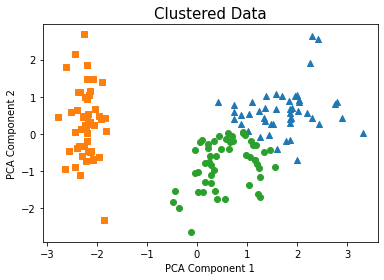

In [23]:
# 군집화한 결과를 차원축소하여 시각화 
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

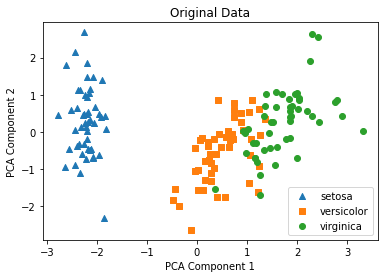

In [24]:
# 오리지널
for i, marker in enumerate(markers): 
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, 
                label = iris.target_names[i] )
plt.legend()
plt.title('Original Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 두 개의 그림 비교

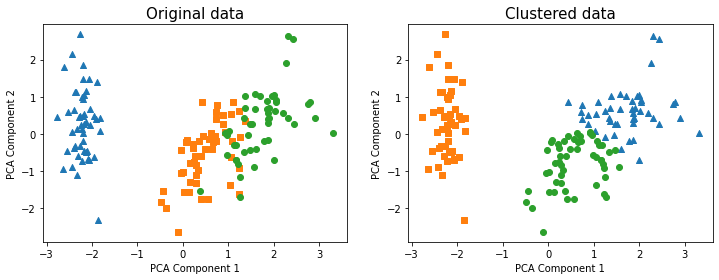

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))       # axs, fig 이해
for k, column in enumerate(['target', 'cluster']):
    ax= axs[k]              # target이면 ax[0], cluster이면 ax[1]


    for i, marker in enumerate(markers): 
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker)
    
    if k == 0 :         # original
        ax.set_title('Original data', fontsize = 15)
    else:
        ax.set_title('Clustered data', fontsize = 15)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
plt.show()

In [26]:
# - plot(121)/ plot(122) : 은지언니꺼 
# - 각각 파일 save해서 이미지 팝업 iamshow) 방법은 많아용  